# Where can young voters swing the EU election?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [3]:
df = pd.read_csv('data/Eurostat-PopulationProjection2019-proj_15npms.csv')
df.head()

,TIME,GEO,UNIT,AGE,SEX,PROJECTION,Value,Flag and Footnotes
0,2019,European Union - 28 countries,Person,Total,Total,Baseline projections,"514,436,397",NaN
1,2019,European Union - 28 countries,Person,16 years,Total,Baseline projections,"5,235,779",NaN
2,2019,European Union - 28 countries,Person,17 years,Total,Baseline projections,"5,299,432",NaN
3,2019,European Union - 28 countries,Person,18 years,Total,Baseline projections,"5,466,860",NaN
4,2019,European Union - 28 countries,Person,19 years,Total,Baseline projections,"5,465,394",NaN


In [4]:
population = df[['GEO', 'AGE', 'Value']]
population.head()

,GEO,AGE,Value
0,European Union - 28 countries,Total,"514,436,397"
1,European Union - 28 countries,16 years,"5,235,779"
2,European Union - 28 countries,17 years,"5,299,432"
3,European Union - 28 countries,18 years,"5,466,860"
4,European Union - 28 countries,19 years,"5,465,394"


In [5]:
def float_conversion(value_str):
    try:
        value=float(value_str.replace(",",""))
        return value
    except:
        pass

In [6]:
population['Value'] = population['Value'].apply(float_conversion)

/Users/grueng/.virtualenvs/dw_data/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2494 entries, 0 to 2493
Data columns (total 3 columns):
GEO      2494 non-null object
AGE      2494 non-null object
Value    2494 non-null float64
dtypes: float64(1), object(2)
memory usage: 58.5+ KB


In [8]:
population.columns=(['location','age','number_people'])
population.head()

,location,age,number_people
0,European Union - 28 countries,Total,514436397.0
1,European Union - 28 countries,16 years,5235779.0
2,European Union - 28 countries,17 years,5299432.0
3,European Union - 28 countries,18 years,5466860.0
4,European Union - 28 countries,19 years,5465394.0


In [9]:
votingage = population[population['age']!='Total']
votingage.head(10)

,location,age,number_people
1,European Union - 28 countries,16 years,5235779.0
2,European Union - 28 countries,17 years,5299432.0
3,European Union - 28 countries,18 years,5466860.0
4,European Union - 28 countries,19 years,5465394.0
5,European Union - 28 countries,20 years,5551222.0
6,European Union - 28 countries,21 years,5656744.0
7,European Union - 28 countries,22 years,5740663.0
8,European Union - 28 countries,23 years,5782370.0
9,European Union - 28 countries,24 years,5910697.0
10,European Union - 28 countries,25 years,6045948.0


In [10]:
# Greece: 17
# Austria and Malta: 16
# All others: 18

In [11]:
countries_list = []
for country in votingage['location']:
    countries_list.append(country)

countries = set(countries_list)
countries

{'Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Estonia',
 'European Union - 28 countries',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'United Kingdom'}

In [12]:
voter_structures = []

for country in countries:
    country_dict = {}
    if country == 'Austria':
        country_dict['location'] = country
        # eligible voters are 16 or older
        voters = votingage[votingage['location']==country]['number_people'].sum()
        country_dict['eligible_voters'] = voters
        # first time voters are at least 16, but maximum 20 years old
        first_timers = votingage[(votingage['location']==country)&((votingage['age']=='16 years')|(votingage['age']=='17 years')|(votingage['age']=='18 years')|(votingage['age']=='19 years')|(votingage['age']=='20 years'))]['number_people'].sum()
        country_dict['firsttime_voters'] = first_timers
        country_dict['share_firsttimers'] = int(first_timers/voters*100)
        # voters up to age 30
        a30_voters = votingage[(votingage['location']==country)&((votingage['age']=='16 years')|(votingage['age']=='17 years')|(votingage['age']=='18 years')|(votingage['age']=='19 years')|(votingage['age']=='20 years')|(votingage['age']=='21 years')|(votingage['age']=='22 years')|(votingage['age']=='23 years')|(votingage['age']=='24 years')|(votingage['age']=='25 years')|(votingage['age']=='26 years')|(votingage['age']=='27 years')|(votingage['age']=='28 years')|(votingage['age']=='29 years')|(votingage['age']=='30 years'))]['number_people'].sum()
        country_dict['age30_voters'] = a30_voters
        country_dict['share_a30voters']  = int(a30_voters/voters*100)
        voter_structures.append(country_dict)
    elif country == 'Malta':
        country_dict['location'] = country
        # eligible voters are 16 or older
        voters = votingage[votingage['location']==country]['number_people'].sum()
        country_dict['eligible_voters'] = voters
        # first time voters are at least 16, but maximum 22 years old
        first_timers = votingage[(votingage['location']==country)&((votingage['age']=='16 years')|(votingage['age']=='17 years')|(votingage['age']=='18 years')|(votingage['age']=='19 years')|(votingage['age']=='20 years')|(votingage['age']=='21 years')|(votingage['age']=='22 years'))]['number_people'].sum()
        country_dict['firsttime_voters'] = first_timers
        country_dict['share_firsttimers'] = int(first_timers/voters*100)
        # voters up to age 30
        a30_voters = votingage[(votingage['location']==country)&((votingage['age']=='16 years')|(votingage['age']=='17 years')|(votingage['age']=='18 years')|(votingage['age']=='19 years')|(votingage['age']=='20 years')|(votingage['age']=='21 years')|(votingage['age']=='22 years')|(votingage['age']=='23 years')|(votingage['age']=='24 years')|(votingage['age']=='25 years')|(votingage['age']=='26 years')|(votingage['age']=='27 years')|(votingage['age']=='28 years')|(votingage['age']=='29 years')|(votingage['age']=='30 years'))]['number_people'].sum()
        country_dict['age30_voters'] = a30_voters
        country_dict['share_a30voters']  = int(a30_voters/voters*100)
        voter_structures.append(country_dict)
    elif country == 'Greece':
        country_dict['location'] = country
        # eligible voters are 17 or older
        voters = votingage[(votingage['location']==country)&(votingage['age']!='16 years')]['number_people'].sum()
        country_dict['eligible_voters'] = voters
        # first time voters are at least 17, but maximum 22 years old
        first_timers = votingage[(votingage['location']==country)&((votingage['age']=='17 years')|(votingage['age']=='18 years')|(votingage['age']=='19 years')|(votingage['age']=='20 years')|(votingage['age']=='21 years')|(votingage['age']=='22 years'))]['number_people'].sum()
        country_dict['firsttime_voters'] = first_timers
        country_dict['share_firsttimers'] = int(first_timers/voters*100)
        # voters up to age 30
        a30_voters = votingage[(votingage['location']==country)&((votingage['age']=='17 years')|(votingage['age']=='18 years')|(votingage['age']=='19 years')|(votingage['age']=='20 years')|(votingage['age']=='21 years')|(votingage['age']=='22 years')|(votingage['age']=='23 years')|(votingage['age']=='24 years')|(votingage['age']=='25 years')|(votingage['age']=='26 years')|(votingage['age']=='27 years')|(votingage['age']=='28 years')|(votingage['age']=='29 years')|(votingage['age']=='30 years'))]['number_people'].sum()
        country_dict['age30_voters'] = a30_voters
        country_dict['share_a30voters']  = int(a30_voters/voters*100)
        voter_structures.append(country_dict)
    else:
        country_dict['location'] = country
        # eligible voters are 18 or older
        voters = votingage[(votingage['location']==country)&(votingage['age']!='16 years')&(votingage['age']!='17 years')]['number_people'].sum()
        country_dict['eligible_voters'] = voters
        # first time voters are older than 18, but maximum 22 years old
        first_timers = votingage[(votingage['location']==country)&((votingage['age']=='18 years')|(votingage['age']=='19 years')|(votingage['age']=='20 years')|(votingage['age']=='21 years')|(votingage['age']=='22 years'))]['number_people'].sum()
        country_dict['firsttime_voters'] = first_timers
        country_dict['share_firsttimers'] = int(first_timers/voters*100)
        # voters up to age 30
        a30_voters = votingage[(votingage['location']==country)&((votingage['age']=='18 years')|(votingage['age']=='19 years')|(votingage['age']=='20 years')|(votingage['age']=='21 years')|(votingage['age']=='22 years')|(votingage['age']=='23 years')|(votingage['age']=='24 years')|(votingage['age']=='25 years')|(votingage['age']=='26 years')|(votingage['age']=='27 years')|(votingage['age']=='28 years')|(votingage['age']=='29 years')|(votingage['age']=='30 years'))]['number_people'].sum()
        country_dict['age30_voters'] = a30_voters
        country_dict['share_a30voters']  = int(a30_voters/voters*100)
        voter_structures.append(country_dict)

In [13]:
voters_df = pd.DataFrame(voter_structures)
voters_df.sort_values(by='share_firsttimers', ascending = False)

,age30_voters,eligible_voters,firsttime_voters,location,share_a30voters,share_firsttimers
0,85563.0,379393.0,33492.0,Malta,22,8
2,671663.0,3554162.0,265273.0,Ireland,18,7
25,10419653.0,52732008.0,4153587.0,France,19,7
5,161797.0,702707.0,51270.0,Cyprus,23,7
22,1006442.0,4678256.0,363114.0,Denmark,21,7
8,11428969.0,52837136.0,4074362.0,United Kingdom,21,7
19,1539904.0,8909593.0,645219.0,Greece,17,7
18,105379.0,496440.0,36071.0,Luxembourg,21,7
12,1832324.0,9173132.0,654515.0,Belgium,19,7
13,2858572.0,13929735.0,1067517.0,Netherlands,20,7


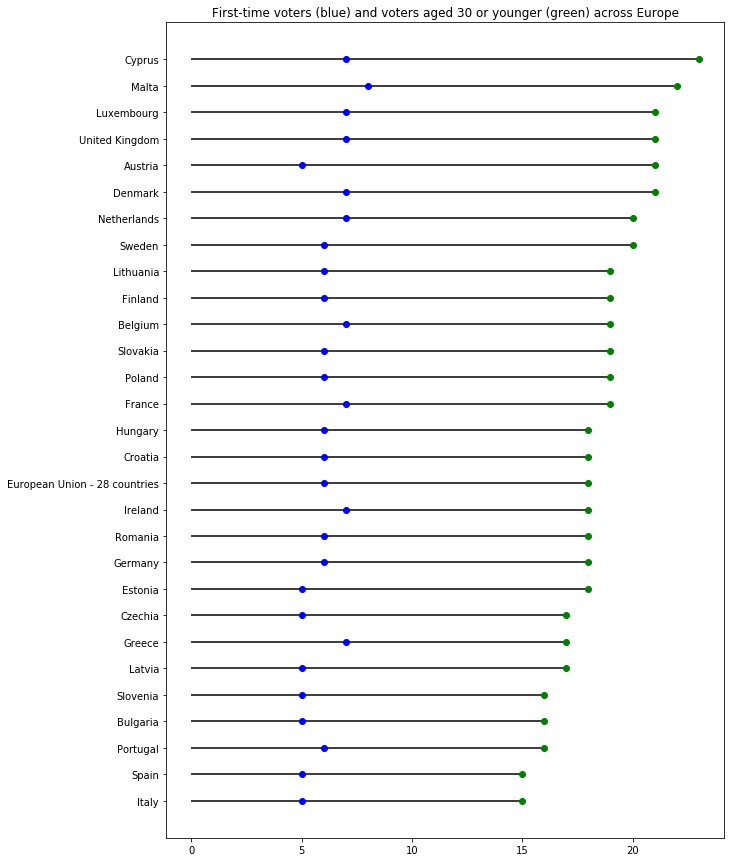

In [14]:
fig, ax = plt.subplots(figsize=(10,15))

ordered_df = voters_df.sort_values(by='share_a30voters')
my_range=range(1,len(ordered_df.index)+1)

plt.hlines(y=my_range, xmin=0, xmax=ordered_df['share_a30voters'])
plt.plot(ordered_df['share_a30voters'], my_range,"o",color="green")
plt.plot(ordered_df['share_firsttimers'], my_range,"o", color="blue")
plt.yticks(my_range, ordered_df['location'])
plt.title('First-time voters (blue) and voters aged 30 or younger (green) across Europe')
plt.savefig('charts/drafts/YoungVoters_AllEurope.pdf', transparent = True)

# Voter turnout among total voting age population for European elections

Voter turnout: IDEA database

URL:
https://www.idea.int/data-tools/continent-view/Europe/40?st=eup#rep

In [15]:
voter_turnout = pd.read_csv('data/IDEA-DB-VoterTurnout-EPelections.csv', delimiter =";")
voter_turnout.head()

,Country,Election type,Year,Voter Turnout,Total vote,Registration,VAP Turnout,Voting age population,Population,Invalid votes,Freedom house,Freedom House - Political Rights,Freedom House - Civil liberties,Compulsory voting
0,Austria,EU Parliament,2014,45.39 %,"2,909,497","6,410,602",39.77 %,"7,315,273","8,615,828",3.00 %,1.0,1.0,1.0,No
1,Austria,EU Parliament,2009,45.97 %,"2,925,132","6,362,761",41.32 %,"7,078,928","8,428,464",2.07 %,1.0,1.0,1.0,No
2,Austria,EU Parliament,2004,42.43 %,"2,566,639","6,049,129",39.95 %,"6,424,824","8,140,122",2.60 %,1.0,1.0,1.0,No
3,Austria,EU Parliament,1999,49.01 %,"2,865,977","5,847,605",46.11 %,"6,215,766","7,982,461",NaN,1.0,1.0,1.0,No
4,Austria,EU Parliament,1996,67.73 %,"3,928,538","5,800,377",63.64 %,"6,172,678","7,953,067",NaN,1.0,1.0,1.0,No


In [16]:
voter_turnout.columns

Index(['Country', 'Election type', 'Year', 'Voter Turnout', 'Total vote',
       'Registration', 'VAP Turnout', 'Voting age population', 'Population',
       'Invalid votes', 'Freedom house', 'Freedom House - Political Rights',
       'Freedom House - Civil liberties', 'Compulsory voting'],
      dtype='object')

In [17]:
turnout = voter_turnout[['Country','Year','Voter Turnout', 'Voting age population']]
turnout.columns = (['country', 'year','voter_turnout','voting_age_population'])
turnout.head(30)

,country,year,voter_turnout,voting_age_population
0,Austria,2014,45.39 %,"7,315,273"
1,Austria,2009,45.97 %,"7,078,928"
2,Austria,2004,42.43 %,"6,424,824"
3,Austria,1999,49.01 %,"6,215,766"
4,Austria,1996,67.73 %,"6,172,678"
5,Belgium,2014,89.64 %,"8,206,928"
6,Belgium,2009,90.39 %,"8,356,666"
7,Belgium,2004,90.81 %,"8,110,168"
8,Belgium,1999,91.05 %,"7,912,208"
9,Belgium,1994,90.66 %,"7,780,372"


In [18]:
def value_conversion(value_str):
    try:
        value=float(value_str.replace(" %",""))
        return value
    except:
        pass

In [19]:
turnout['voter_turnout'] = turnout['voter_turnout'].apply(value_conversion)

/Users/grueng/.virtualenvs/dw_data/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
turnout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 4 columns):
country                  147 non-null object
year                     147 non-null int64
voter_turnout            147 non-null float64
voting_age_population    141 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 4.7+ KB


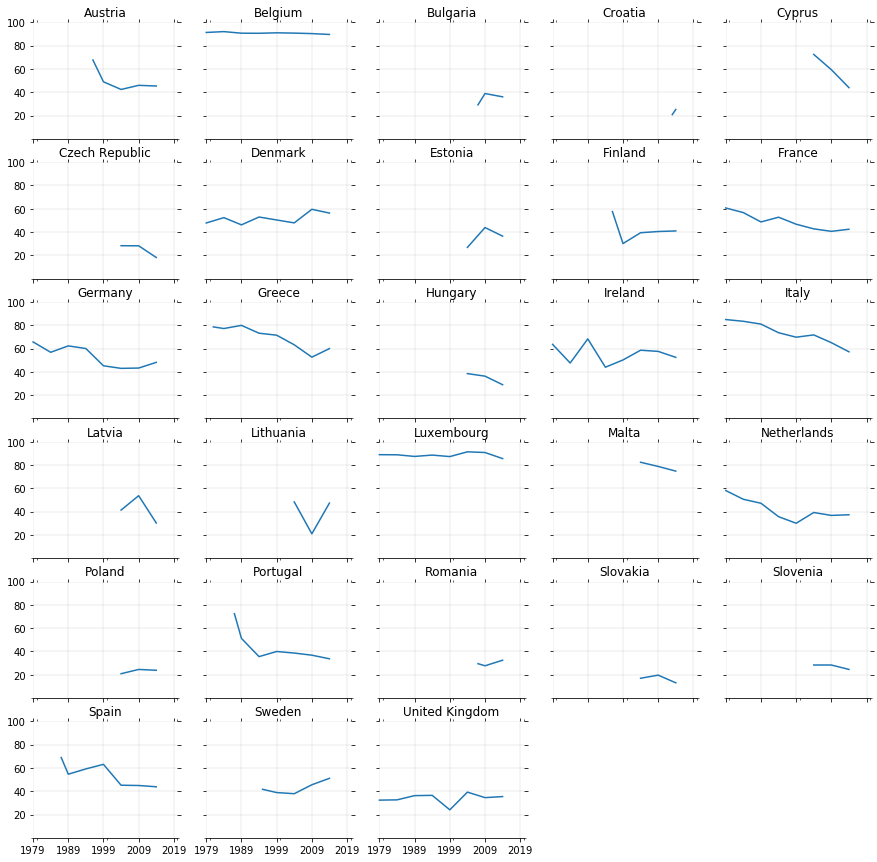

In [21]:
fig, axes = plt.subplots(nrows=6, ncols=5, sharex=True, sharey=True, figsize=(15,15))
axes_list = [item for sublist in axes for item in sublist] 

for countryname, selection in turnout.groupby("country"):
    ax = axes_list.pop(0)
    selection.plot(x='year', y='voter_turnout', label=countryname, ax=ax, legend=False, clip_on=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off',
    )
    ax.grid(linewidth=0.25)
    ax.set_xlim((1979, 2020))
    ax.set_ylim((0,100))
    ax.set_xlabel("")
    ax.set_xticks(range(1979, 2020, 10))
    ax.set_yticks(range(20, 120, 20))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

for ax in axes_list:
    ax.remove()

plt.savefig("charts/drafts/Voter-Turnout-EU-Elections.png", transparent = True)

In [22]:
turnout[turnout['year']==2014].median()

year             2014.000
voter_turnout      41.705
dtype: float64

In [23]:
turnout[turnout['year']==2014].sort_values(by='voter_turnout', ascending = False)

,country,year,voter_turnout,voting_age_population
5,Belgium,2014,89.64,"8,206,928"
89,Luxembourg,2014,85.55,"405,676"
97,Malta,2014,74.80,"330,921"
56,Greece,2014,59.97,"8,798,915"
75,Italy,2014,57.22,"50,577,526"
24,Denmark,2014,56.32,"4,302,187"
67,Ireland,2014,52.44,"3,586,748"
134,Sweden,2014,51.07,"7,614,029"
48,Germany,2014,48.14,"66,952,598"
86,Lithuania,2014,47.35,"2,807,195"
